In [577]:
import numpy as np
import pandas as pd
import imblearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline


In [578]:
# df = pd.read_csv('https://raw.githubusercontent.com/5unof4Beach/IOT-2022/master/city_day.csv') 
df = pd.read_csv('./city_day.csv') 

Data Cleansing

In [579]:
df.isnull().sum()

City              0
Date              0
PM25           4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [580]:
df.isna().sum() 

City              0
Date              0
PM25           4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [581]:
df.drop_duplicates(keep='first', inplace=True)
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM25        24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [582]:
df.head() 

,City,Date,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [583]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM25        24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


# Chọn số lượng dòng

In [584]:
df = df.head(10000)

# Set các giá trị NaN thành 0

In [585]:
print(df.columns.difference([df.columns[i] for i in [0,1,-1]], sort=False)) 

# Loại bỏ tất cả các hàng có giá trị AQI_Bucket = 0

df = df.fillna(0) 
for x in df.columns.difference([df.columns[i]for i in [0,1,-1]], sort=False):
    df[x] = pd.to_numeric(df[x], errors='coerce')
df = df[df.AQI != 0]

date = df.Date
df = df.drop([df.columns[i] for i in range(-1,2)], axis=1)
df = df.mask(df==0).fillna(df.mean()) 

Index(['PM25', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene',
       'Toluene', 'Xylene', 'AQI'],
      dtype='object')


# Normalize dữ liệu

In [586]:
from sklearn import preprocessing

extract = pd.concat([date, df], axis=1, join='inner')
extract.to_csv(r'./air_quality.csv', index=False) 
print(extract)

lastCol = df.columns[-1] 
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=df.columns)

df.head()

            Date    PM25       PM10     NO    NO2    NOx        NH3     CO  \
28    2015-01-29   83.13  62.998354   6.93  28.71  33.72  23.299147   6.93   
29    2015-01-30   79.84  62.998354  13.85  28.68  41.08  23.299147  13.85   
30    2015-01-31   94.52  62.998354  24.39  32.66  52.61  23.299147  24.39   
31    2015-02-01  135.99  62.998354  43.48  42.08  84.57  23.299147  43.48   
32    2015-02-02  178.33  62.998354  54.56  35.31  72.80  23.299147  54.56   
...          ...     ...        ...    ...    ...    ...        ...    ...   
9995  2019-11-11   37.65  50.650000  11.44  29.58  41.05   3.360000   0.53   
9996  2019-11-12   52.48  61.450000  12.21  31.26  43.46   3.190000   0.58   
9997  2019-11-13   37.83  47.300000  10.56  26.77  37.34   3.390000   0.45   
9998  2019-11-14   43.18  49.360000  11.09  28.47  39.56   3.440000   0.47   
9999  2019-11-15   36.48  43.780000  11.36  23.84  35.21   4.770000   0.42   

        SO2      O3   Benzene   Toluene     Xylene    AQI  
28 

,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.095533,0.068481,0.017663,0.098161,0.089005,0.065971,0.039363,0.264066,0.367757,0.000026,0.016609,0.022774,0.094042
1,0.091744,0.068481,0.035377,0.098058,0.108467,0.065971,0.078726,0.258515,0.597512,0.000077,0.016609,0.034924,0.152634
2,0.108647,0.068481,0.062358,0.111690,0.138955,0.065971,0.138680,0.360369,0.685325,0.000587,0.000000,0.055733,0.244215
3,0.156396,0.068481,0.111225,0.143953,0.223465,0.065971,0.247270,0.402619,0.632182,0.000995,0.000073,0.188155,0.376169
4,0.205147,0.068481,0.139588,0.120766,0.192342,0.065971,0.310296,0.293813,0.661001,0.001148,0.000122,0.259022,0.441162


In [587]:
categorical_vars = [lastCol]

y = df[categorical_vars]
X = df[[df.columns[i] for i in range(0,9)]]  
# X = df[[df.columns[i] for i in [0,3,6]]]  
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train
y_train 

(6048, 9) (2592, 9) (6048, 1) (2592, 1)


,AQI
5843,0.107829
2338,0.012309
2908,0.032496
5300,0.025603
3002,0.063516
...,...
5734,0.044313
5191,0.029542
5390,0.111275
860,0.379616


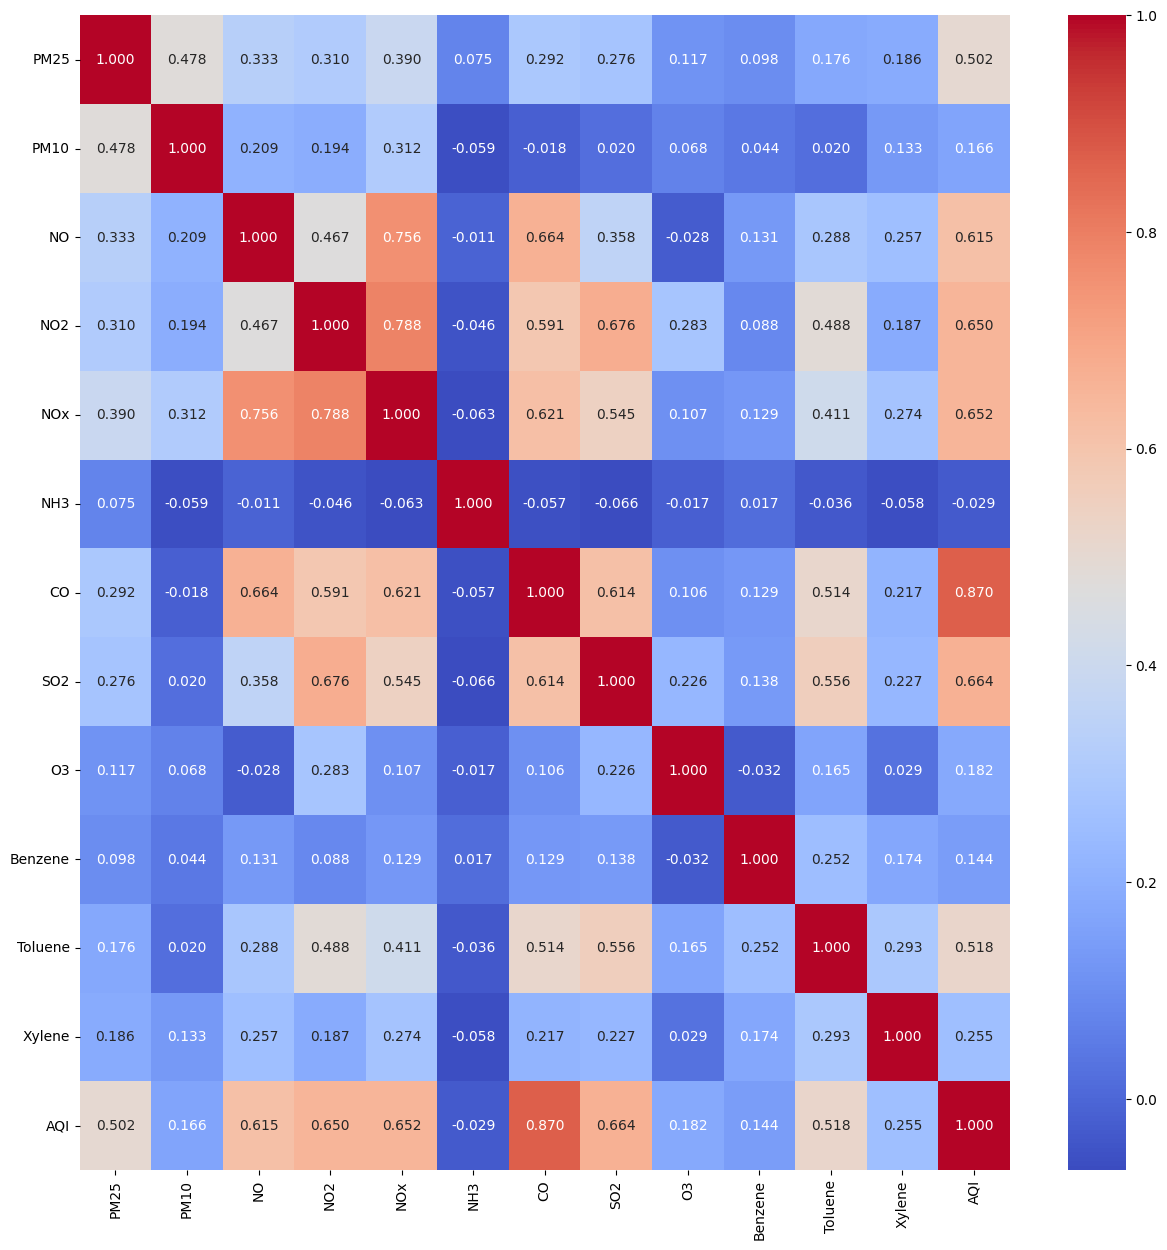

In [588]:
corr_matrix = df.corr() 
corr_matrix.to_csv(r'./corr.csv', index=True)
sns.heatmap(corr_matrix,annot = True,cmap='coolwarm',fmt='.3f', xticklabels=df.columns, yticklabels=df.columns)
figure= plt.gcf()
figure.set_size_inches(15,15)
plt.show()

Liệt kê chỉ số tương quan của các cặp từ nhỏ đến lớn

In [589]:
corr_matrix.unstack().sort_values().drop_duplicates()

NH3   SO2      -0.065918
NOx   NH3      -0.062933
PM10  NH3      -0.059285
NH3   Xylene   -0.057771
      CO       -0.056616
                  ...   
NO2   SO2       0.675584
NOx   NO        0.756459
NO2   NOx       0.788070
AQI   CO        0.870171
PM25  PM25      1.000000
Length: 79, dtype: float64

# Linear Regresion của Sklearn

In [590]:
model = LinearRegression()
model.fit(X_train, y_train )

accuracy = model.score(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100)) 

Accuracy: 87.46


# Linear regression code chay

In [642]:
def customScore(y_test, y_pred):
    corr_matrix = np.corrcoef(y_test, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2 

def customMSE(y_test, y_pred):
    return np.mean((y_test - y_pred) ** 2)

def dot_product(a,b):
    return np.sum([i*j for (i, j) in zip(a, b)])

class CustomLinearRegression:
    def __init__(self):
        self.lr = 0.003
        self.epochs = 2000
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = X.to_numpy()
        y = y.to_numpy().flatten()

        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0 
        for i in range(self.epochs):
            y_predicted = dot_product(X, self.weights) + self.bias
            dw = (1 / n_samples) * dot_product(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y) 

            self.weights -= self.lr * dw
            self.bias -= self.lr * db 

    def predict(self, X):
        predictionRes = dot_product(X.to_numpy(), self.weights) + self.bias
        predictionRes = np.dot(X.to_numpy(), self.weights) + self.bias
        return predictionRes

In [643]:
model2 = CustomLinearRegression()    
model2.fit(X_train, y_train)

predictions = model2.predict(X_test).flatten() 
predictions_lib = model.predict(X_test).flatten()

mse = customMSE(y_test.to_numpy().flatten(), predictions)
mse2 = customMSE(y_test.to_numpy().flatten(), predictions_lib)

print('MSE Lib', mse2)
print("MSE:", mse)

print(predictions)
accu2 = customScore(y_test.to_numpy().flatten(), predictions_lib) 
accu = customScore(y_test.to_numpy().flatten(), predictions)

print("Accuracy Lib:", accu2 * 100)
print("Accuracy Custom:", accu * 100)

MSE Lib 0.0011308409542668504
MSE: 0.01686370581883413
[0.15656681 0.16104142 0.15884379 ... 0.16161299 0.15349644 0.15657889]
Accuracy Lib: 87.46187422988623
Accuracy Custom: 63.56032279905315


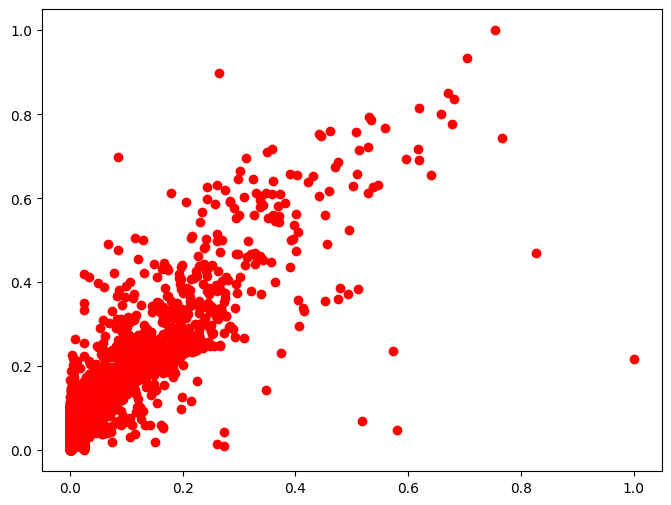

In [649]:
y_pred_line = predictions
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6)) 
plt.scatter(df['CO'],df['AQI'] , color="red")
plt.show()